# Einleitung:

Die Vielfalt der regionalen Küchen und Kochstile auf der ganzen Welt ist faszinierend. Von der pikanten Gewürzmischung in der indischen Küche bis hin zur zarten Perfektion der französischen Patisserie gibt es unzählige Geschmackserlebnisse, die von Land zu Land variieren. Diese Vielfalt ist das Ergebnis einer langen Geschichte, kultureller Einflüsse und vor allem der Verfügbarkeit von Zutaten.

Die regionalen Kochstile wurden historisch und kulturell oft stark von der Verfügbarkeit bestimmter Zutaten geprägt. Nehmen wir zum Beispiel das Gewürz Safran. Es ist bekannt für seinen einzigartigen Geschmack und wird in der spanischen Küche verwendet, insbesondere in der berühmten Paella. Safran ist jedoch nicht überall in der Welt erhältlich, da er aus den Blütennarben der Safrankrokusblume gewonnen wird, die nur in bestimmten Regionen gedeiht. Die Verfügbarkeit von Safran hat daher die Entwicklung der spanischen Küche maßgeblich beeinflusst.

Ein weiteres Beispiel ist die Verwendung von Kokosnuss in der thailändischen Küche. Kokospalmen wachsen vor allem in tropischen Gebieten, daher ist Kokosnussöl, Milch und geriebene Kokosnuss eine wichtige Zutat in der thailändischen Küche. Die reichhaltige Verwendung von Kokosnuss verleiht den thailändischen Gerichten ihren charakteristischen Geschmack und macht sie unverwechselbar.

Früher war die Verfügbarkeit von lokalen Zutaten und Gewürzen stark begrenzt. Reisen in ferne Länder waren mühsam und zeitaufwendig. Heutzutage hingegen stellen moderne Transportmittel eine scheinbare Leichtigkeit dar, um exotische Zutaten von überall auf der Welt zu beziehen. Solange man über ausreichende finanzielle Mittel verfügt, kann man jetzt eine Vielzahl von Lebensmitteln aus verschiedenen Regionen der Welt beziehen.

Das Auseinandersetzen mit den kulinarischen Eigenheiten einer Kultur kann die Achtsamkeit für das Alltägliche steigern. Dies war möglicherweise der Anlass für den Wettbewerb „Whats Cooking?“ der Online-Community für Datenwissenschaftler und Machine-Learning-Praktizierende Kaggle. Kaggle wurde 2010 von Anthony Goldbloom und Hamish Robertson gegründet und wird von Google als Tochtergesellschaft betrieben. Ziel des Wettbewerbs war es, mittels eines Trainingsdatensatzes vorhersagen über einen ungelabelten Datensatz zu treffen. Wer die präziseste Vorhersage traf, gewann den Wettbewerb.


# Ziel der Ausarbeitung:

Das Ziel dieser Ausarbeitung ist die Entwicklung eines Modells, das anhand der Zutaten eines Restaurants dessen kulturelle Herkunft vorhersagen kann.
Dabei sollen bestehende Implementationen für diese Aufgabenstellung analysiert, und neue Herangehensweisen exploriert werden.


# Vorbereitung
Sollten die Daten nicht im Upload enthalten sein, müssen sie unter https://www.kaggle.com/competitions/whats-cooking/data und im selben Verzeichnis wie dieses Notebook entpackt werden.

Aufgrund der Dateigrößenbeschränkung des Uploads muss das CookBERT-Modell unter diesem Link https://drive.google.com/drive/folders/1l1izk2hQp2AvLe0uFywoP0z3ZccMFng- heruntergeladen und im selben Verzeichnis wie dieses Notebook entpackt werden.

Das Wurzelverzeichnis in dem dieses Notebook liegt sollte wie folgt aussehen:

    /CookBERT-checkpoint
    /Data
    /Data/Test
    /Data/Train
    /AusarbeitungFinal.ipynb


## Daten Exploration

Zuerst wird die Datenlage analysiert. Neben den grundsätzlichen Attributen des Datensatzes, wie der Anzahl der Klassen, der Anzahl der Features und der Anzahl der Datenpunkte, wird auch die Klassenrepräsentation betrachtet.

Die Datenqualität ist entscheidend für Machine Learning-Modelle und maßgeblich für die Auswahl des Machine Learning-Algorithmus und die Erfolgsaussichten auf eine hohe Vorhersagequalität.

In [1]:
import pandas as pd

In [2]:
train = pd.read_json("Data/train/train.json")

In [3]:
train.head

<bound method NDFrame.head of           id      cuisine                                        ingredients
0      10259        greek  [romaine lettuce, black olives, grape tomatoes...
1      25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
2      20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
3      22213       indian                [water, vegetable oil, wheat, salt]
4      13162       indian  [black pepper, shallots, cornflour, cayenne pe...
...      ...          ...                                                ...
39769  29109        irish  [light brown sugar, granulated sugar, butter, ...
39770  11462      italian  [KRAFT Zesty Italian Dressing, purple onion, b...
39771   2238        irish  [eggs, citrus fruit, raisins, sourdough starte...
39772  41882      chinese  [boneless chicken skinless thigh, minced garli...
39773   2362      mexican  [green chile, jalapeno chilies, onions, ground...

[39774 rows x 3 columns]>

Ein erster Blick auf die Daten zeigt, dass die Features nicht in Spalten aufgeteilt sind, sondern als Liste in der Spalte "Ingredients" vorliegen.

Als nächstes werden die Anzahl der vorherzusagenden Klassen und deren Verteilung visualisiert. Dazu wird eine Grafik mithilfe von Matplotlib erstellt.

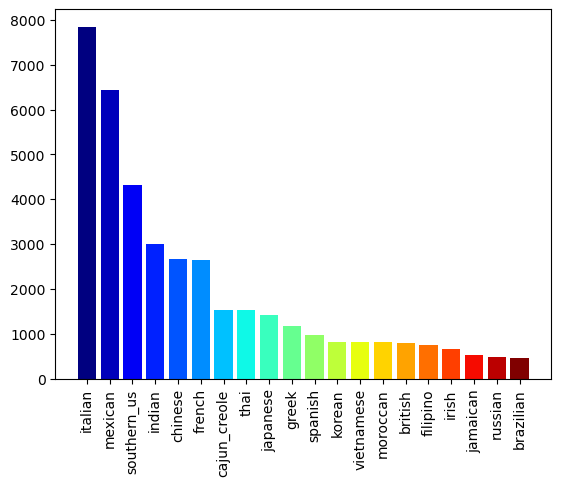

In [4]:
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

keypair = dict(train.cuisine.value_counts())

# Erstelle eine Liste mit den Farben, die auf die Bar-Höhen angewendet werden sollen.
# Die Farben werden in der Reihenfolge der Bar-Höhen angewendet.
colors = cm.jet(np.linspace(0, 1, len(keypair)))

# Zeichne die Bars und passe die Farben an.
plt.bar(keypair.keys(), keypair.values(), color=colors)

# Drehe die x-Ticks um 90 Grad.
plt.xticks(rotation = 90)

# Zeige das Diagramm an.
plt.show()

Es ist klar zu erkennen, dass die Daten nicht balanciert sind. Dies bedeutet, dass es für manche Klassen viele Datenpunkte gibt, während es für andere verhältnismäßig wenige gibt. Viele Machine-Learning-Algorithmen sind anfällig für diese Ungleichgewichtigkeit. Um dem entgegenzuwirken, können Methoden wie Resampling oder Class Weighting verwendet werden.

Anschließend soll die Verteilung und Häufigkeit von Zutaten untersucht werden.

In [5]:
def count_word_occurrences(word_list, word_counts):
    # Diese Funktion zählt die Anzahl der Vorkommen jedes Wortes in einer Liste von Wörtern,
    for word in word_list:
        # Die Zählung für das aktuelle Wort im Wörterbuch `word_counts` wird erhöht.
        word_counts[word] = word_counts.get(word, 0) + 1

In [6]:
from tqdm.notebook import trange, tqdm
word_count_dict = {}

for row in tqdm(train.ingredients):
    count_word_occurrences(row, word_count_dict)

  0%|          | 0/39774 [00:00<?, ?it/s]

In [ ]:
all_ingredients = word_count_dict.keys()
# Sortiere die Liste
all_ingredients = sorted(all_ingredients)
print(f"Es gibt { len(all_ingredients)} unterschiedliche Zutaten")


In vielen Bereichen des maschinellen Lernens ist die Dimensionsreduktion eine wichtige Komponente, um die Genauigkeit eines Modells zu verbessern. 
Dimensionsreduktion ist die Vorverarbeitung von Daten und beinhaltet das Entfernen von verrauschten und irrelevanten Daten, um die Vorhersagequalität zu erhöhen. [5]
Vermutlich wäre das Klassifizierungsproblem einfacher zu lösen, wenn es weniger unterschiedliche Zutaten gäbe. Bei dieser hohen Anzahl von Zutaten ist auch davon auszugehen, dass der Datensatz inhaltlich gleiche Inhaltsstoffe enthält, die jedoch unterschiedlich formuliert sind. Im Idealfall würden inhaltlich gleiche Zutaten auch gleich benannt werden.

Um die Datenqualität in diesem Hinblick zu untersuchen werden stichprobenartig Zutaten ausgegeben.

In [8]:
#Gebe die ersten 20 Zutaten aus
for i, ingredient in enumerate(all_ingredients):
    print(ingredient)
    if i>20:
        break

(    oz.) tomato sauce
(   oz.) tomato paste
(10 oz.) frozen chopped spinach
(10 oz.) frozen chopped spinach, thawed and squeezed dry
(14 oz.) sweetened condensed milk
(14.5 oz.) diced tomatoes
(15 oz.) refried beans
1% low-fat buttermilk
1% low-fat chocolate milk
1% low-fat cottage cheese
1% low-fat milk
2 1/2 to 3 lb. chicken, cut into serving pieces
2% low fat cheddar chees
2% low-fat cottage cheese
2% lowfat greek yogurt
2% milk shredded mozzarella cheese
2% reduced-fat milk
25% less sodium chicken broth
33% less sodium cooked deli ham
33% less sodium cooked ham
33% less sodium ham
33% less sodium smoked fully cooked ham


Hier stechen die Mengenangaben hervor, diese könnten entfernt werden, um die Datenqualität zu steigern. Vermutlich ist die Menge einer Zutat nicht ausschlaggebend für das Herkunftsland eines Rezepts oder eines Restaurants. Andererseits kann die Einheit ein Hinweis auf ein Herkunftsland sein. 

In [9]:
#Gebe die letzten 20 Zutaten aus
for i, ingredient in enumerate(reversed(all_ingredients)):
    print(ingredient)
    if i>20:
        break

zucchini blossoms
zucchini
ziti
zinfandel
zesty italian dressing
zest
za'atar
yuzu juice
yuzu
yukon gold potatoes
yukon gold
yucca root
yucca
yuca
yu choy
young nettle
young leeks
young coconut meat
yoplait
yolk
yogurt low fat
yogurt dressing


In diesem Ausschnitt der Liste ist eine weitere Herausforderung erkennbar. Zutaten wie Yucca existieren mit einer oder zwei Cs. Es würde sich lohnen, diese Schreibweisen zu vereinen. Bei 6714 verschiedenen Zutaten ist das manuelle Heraussuchen und Vereinigen solcher Fälle ein enormer Aufwand. Möglicherweise gibt es eine Möglichkeit, diesen Prozess zu automatisieren.

Zusätzlich tauchen in der Liste auch Adjektive wie "young" auf. Das Entfernen dieser Adjektive würde wahrscheinlich helfen, die Anzahl der Zutaten zu reduzieren und sie aussagekräftiger zu machen. Es gibt verschiedene etablierte Methoden zur Dimensionsreduktion wie etwa PCA. In diesem Konkreten Fall wäre auch das Zusammenfassen von ähnlichen Zutaten mittels eines Distanzmaßes wie der Levenstein Distanz denkbar. 

In dieser Ausarbeitung soll jedoch eine andere Möglichkeit untersucht werden die potentiell weniger anfällig für Adjektive oder Synonyme Zutaten ist, um eine Zutatenliste in einen niedrigdimensionalen Vektor einzubetten.

Nun sollen untersucht werden, welche Zutaten besonders häufig vorkommen.

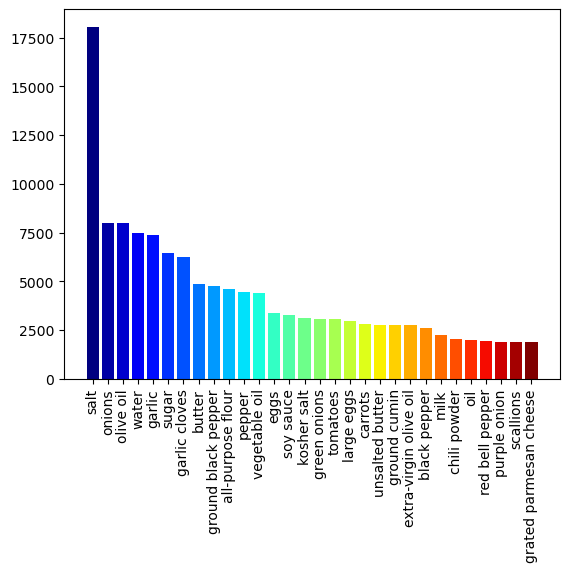

In [10]:
from itertools import islice
# Sortieren nach vorkommen
sorted_dict_descending = {k: v for k, v in sorted(word_count_dict.items(), key=lambda item: item[1], reverse=True)}

keypair = dict(islice(sorted_dict_descending.items(), 30))

# Erstelle eine Liste mit den Farben, die auf die Bar-Höhen angewendet werden sollen.
# Die Farben werden in der Reihenfolge der Bar-Höhen angewendet.
colors = cm.jet(np.linspace(0, 1, len(keypair)))

# Zeichne die Bars und passe die Farben an.
fig = plt.bar(keypair.keys(), keypair.values(), color=colors)

# Drehe die x-Ticks um 90 Grad.
plt.xticks(rotation = 90)

# Zeige das Diagramm an.
plt.show()

#print(dict(islice(sorted_dict_descending.items(), 30)))

Salz, Zwiebeln, Oliven Öl, Wasser und Knoblauch scheinen die gängigsten Zutaten in diesem Datensatz zu sein.

# Vorverarbeitung der Daten

Die Ausgabe des ML-Modells wird ein Integer sein. Deshalb muss die 'cuisine' Spalte des Datensatzes zunächst zu einem Integer konvertiert werden. Zu diesem Zweck wird ein Dictionary label_encoder_dict angelegt, es wird später noch einmal benötigt um einen Versuch bei Kaggle einzureichen.

In [11]:
# Erstellen einer Liste mit allen möglichen Küchen herkünften
classes = train['cuisine'].unique()

# Dieses Dictionary ordnet einer Küche einen Integer zu
label_encoder_dict = {item : index for index,item in enumerate(classes)}

# Example 4: Add column using apply()
train['target'] = train.apply(lambda x: label_encoder_dict[x['cuisine']], axis=1)


Inspiriert von der Lösung durch den Kaggle nutzer KAVYA SREE [1] werden Küchen mit sehr wenigen oder vielen Zutaten gelöscht. Diese Datenpunkte werden als Ausreißer gesehen und können das Training eines ML-Modells negativ beeinflussen.

In [12]:
#no of Ingredients
train['ing_count'] = train['ingredients'].str.len()

train = train[train['ing_count'] > 1]
train = train[train['ing_count']<60]

train.to_json("cleaned_data.json")

Bei der Datenexploration wurde festgestellt, dass die Klassen ungleich repräsentiert sind. Dies kann den Lernerfolg eines Modells beeinträchtigen, da die Parameter des Modells häufiger zugunsten der stark repräsentierten Klassen angepasst werden. Eine Möglichkeit, diesem Phänomen entgegenzuwirken, besteht darin, die Belohnung für stark repräsentierte Klassen zu verringern. So stellt ihre relative Häufigkeit kein Problem mehr da. 

Die Liste class_weights enthält eine solche Gewichtung für die vorherzusagenden Klassen. Dabei steht das Gewicht der jeweiligen Klasse, an dem Index, der durch label_encoder_dict vorgegeben wurde.

In [13]:
# Die Anzahl der verschiedenen Küchen im gesamten Datensatz
class_counts = train.cuisine.value_counts()

# Klassengewichte, klassen die oft vorkommen, erhalten einen kleineren Wert
class_weights = [len(train) / (len(classes)*class_counts[item]) for index,item in enumerate(classes)]

In [14]:
print("Correct classification of the classes will be weighted by the following factors")
for key in label_encoder_dict:
    print(f"{key} : {class_weights[label_encoder_dict[key]]}")

Correct classification of the classes will be weighted by the following factors
greek : 1.6929727427597956
southern_us : 0.460187543412827
filipino : 2.6325165562913906
indian : 0.6631798465131798
jamaican : 3.77861216730038
spanish : 2.013728470111449
italian : 0.2536434405308831
mexican : 0.3088175885643257
chinese : 0.7435652824541713
british : 2.4720771144278606
thai : 1.2939778645833333
vietnamese : 2.4120752427184464
cajun_creole : 1.285608020698577
brazilian : 4.255995717344754
french : 0.7517208774583963
japanese : 1.3996830985915494
irish : 2.9798350824587705
korean : 2.3946385542168676
moroccan : 2.4208891595615105
russian : 4.064519427402863


In [15]:
#free some memory
del train
del sorted_dict_descending
del all_ingredients
del word_count_dict

Der Datensatz wurde so angepasst das er weniger Ausreißer enthält und um eine Spalte erweitert, die dem String label einen Int wert zuweist. Um mit dem Training eines Modells beginnen zu können, muss auch die Zutaten liste in eine Numerische form gebracht werden.

## Vektorisierung

Die Herausforderung besteht darin, eine Liste von Strings in einen Vektor zu verwandeln, der für Machine Learning (ML) und Deep Learning (DL) nutzbar ist. Eine Möglichkeit, dies zu tun, ist das One-Hot-Encoding. Ein solcher Vektor kann dann von einer Vielzahl von ML-Algorithmen verwendet werden, wie z. B. Klassifizierung, Regression und Clustering.

In [16]:
from sklearn.preprocessing import OneHotEncoder
test_docs = [["Olive", "Yucca", "Salt"], ["Olive", "Yucca", "Sugar"]]

enc = OneHotEncoder(handle_unknown='ignore')
print(enc.fit_transform(test_docs).todense())

[[1. 1. 1. 0.]
 [1. 1. 0. 1.]]


Das obige Beispiel zeigt, wie One-Hot-Encoding für die Testdokumente in test_docs verwendet wird. Dabei wird jedem einzigartigen Wort im Dokument eine Spalte zugewiesen. Da es zwei Dokumente und vier unterschiedliche Wörter im Korpus gibt, ist das Ergebnis eine 2x4-Matrix.

Ein Dokument wird dargestellt, indem im jeweiligen Vektor eine 1 eingetragen wird, wenn das Wort der jeweiligen Spalte im Dokument existiert.


Bestehende gut performende Lösungen für die Kaggle-Wettbewerb "What's Cooking" verwenden Lemmatisierung, um die Anzahl der Features zu verringern, und Textfrequenz-Inverse-Dokumentfrequenz-Vektorisierung (TF-IDF), um eine Vektorisierung durchzuführen.

Lemmatisierung ist ein Verfahren, bei dem verschiedene Formen eines Wortes zu einer gemeinsamen Basisform zusammengefasst werden. Dies kann hilfreich sein, um die Anzahl der Features zu verringern, die verwendet werden, um ein Dokument zu beschreiben. TF-IDF-Vektorisierung ist eine Technik, bei der die Häufigkeit, mit der ein Wort in einem Dokument vorkommt, in Relation zur Anzahl der Dokumente, in denen das Wort vorkommt, gesetzt wird. Dies kann hilfreich sein, um die Bedeutung der einzelnen Wörter in einem Dokument zu erfassen.

Die Kombination von Lemmatisierung und TF-IDF-Vektorisierung hat sich als effektives Verfahren erwiesen, um die Leistung von Machine Learning-Modellen für die Textklassifizierung zu verbessern.

In [17]:
# copied from https://www.kaggle.com/code/kavyasreeb/whats-cooking
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True)
# sublinear_tf scaling addresses the problem that 20 occurrences of a word is probably not 20 times more important than 1 occurrence

In [18]:
test_docs = ["Olive Yucca Salt", "Olive Yucca Sugar"]

# Erzeuge die Sparse Matrix
vectorized_docs =  vectorizer.fit_transform(test_docs)

In [19]:
print(f"Die Sparse MAtrix die zurück gegeben wird hat die form{vectorized_docs.shape}")

print(vectorized_docs)

Die Sparse MAtrix die zurück gegeben wird hat die form(2, 4)
  (0, 1)	0.7049094889309326
  (0, 3)	0.5015489070943787
  (0, 0)	0.5015489070943787
  (1, 2)	0.7049094889309326
  (1, 3)	0.5015489070943787
  (1, 0)	0.5015489070943787


An diesem kleinen Beispiel ist zu sehen, wie die TF-IDF Dokumente in eine Sparse-Matrix umwandelt. Eine Sparse-Matrix enthält nur Einträge, die einen Wert ungleich 0 haben. Die Matrix in diesem Beispiel enthält 8 Einträge, aber die Einträge an den Positionen (0,2) und (1,1) haben den Wert 0.

Jede Zeile in der Matrix stellt ein Dokument dar, das aus einer Zutatenliste besteht. Jede Spalte in der Matrix stellt ein Wort im Korpus dar. In diesem Beispiel gibt es 4 verschiedene Wörter, weshalb es 4 Spalten gibt.

Wörter, die zwei Mal in den Dokumenten vorkommen, erhalten einen kleineren Zahlenwert. Diese Eigenschaft kann wünschenswert sein, weil sie dazu führt, dass Wörter mit einer hohen Häufigkeit kleiner gewichtet werden. Häufige Wörter sind möglicherweise nicht besonders aussagekräftig für eine Vorhersage, weil sie über viele Klassen verteilt sind.

Bisherige Arbeiten haben gezeigt, dass die Verwendung von TF-IDF-Vektorisierung und Support-Vektor-Maschinen oder neuronalen Netzen zu einem Kaggle-Score von 0,8 und höher auf den Testdaten führen kann [1]. In diesem Abschnitt wird die Verwendung eines neuronalen Netzes in Kombination mit einer anderen Vektorisierungsmethode untersucht.

Anstelle von TF-IDF wird ein Embedding eines Transformer-Modells verwendet. Es ist anzunehmen, dass ein solches Embedding für die Zutaten "young nettle" und "nettle" ähnlich ist. So könnte ein Modell die Ähnlichkeit zwischen den beiden Begriffen lernen und eventuell korrekte Vorhersagen treffen. Neben der korrekten Vorhersage der Testdaten zur Einreichung bei Kaggle würde das Modell auch freiere Eingaben von Nutzern verarbeiten können, was es außerhalb des Wettbewerbs anwendbar macht.


Transformer-Modelle sind eine Art neuronales Netz, das für die Verarbeitung natürlicher Sprache entwickelt wurde. Sie wurden erstmals 2017 in dem Papier "Attention Is All You Need" von Vaswani et al. vorgestellt [2]. Transformer-Modelle sind besonders gut darin, lange Reihen von Wörtern zu verarbeiten und Beziehungen zwischen ihnen zu erkennen. Dies macht sie zu einer guten Wahl für eine Vielzahl von NLP-Aufgaben, wie z. B. Machine Translation, Text Summarization und Question Answering.

BERT (Bidirectional Encoder Representations from Transformers) ist ein Transformer-Modell, das von Google AI entwickelt wurde. Es wurde 2018 in dem Papier "BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding" von Devlin et al. vorgestellt [3]. BERT wurde auf einem riesigen Datensatz aus Text und Code trainiert und kann für eine Vielzahl von NLP-Aufgaben verwendet werden. Eine Besonderheit von BERT ist, die Möglichkeit ein Basismodell zu "finetunen". Dabei wird ein Basismodell mit einem Topic spezifischen Datensatz trainiert um besser in spezifischen Domänen zu funktionieren.

Satz-Embeddings sind eine Art Vektordarstellung eines Satzes. Sie sind extrahierbar, indem die Aktivierungen eines BERT-modells in einer bestimmten Schicht verwendet werden, nachdem ein eingabe Satz präsentiert wurde.

Es gibt mehrere Möglichkeiten, ein Embedding für Zutaten herzustellen. Eine Möglichkeit besteht darin, die Zutaten einzeln zu präsentieren und die entstehenden Embeddings elementweise zu mitteln. Dies ergibt einen Vektor mit fester Länge, der die Informationen aller Zutaten-Embeddings enthält. Eine andere Möglichkeit besteht darin, die Zutaten in einem Satz zu präsentieren, um ein Embedding zu erhalten.

Im folgenden wird ebenfalls untersucht, welchen Einfluss das BERT-Modell hat, das zum Embedden verwendet wird. Es werden zwei Modelle getestet:

   1. Ein BERT-Modell, das auf einem allgemeinen Textdatensatz trainiert wurde 'bert-base-nli-mean-tokens'

   2. CookBERT, ein BERT-Modell, das auf einem Rezeptdatensatz trainiert wurde [4]

CookBERT ist ein BERT-Modell, das auf dem RecipeNLG-Datensatz trainiert wurde. Dieser Datensatz enthält Rezepte aus verschiedenen Sprachen. CookBERT enthält daher einen erweiterten Tokensatz, der Wörter und Phrasen enthält, die in Rezepten typischerweise vorkommen. Darüber hinaus wurde CookBERT auf einem Domain-spezifischen Datensatz trainiert. Dies könnte dazu beitragen, die Vorhersagegenauigkeit zu verbessern, da das Modell die Beziehungen zwischen Zutaten besser verstehen kann.

Um Herauszufinden welchen Einfluss Embeddingmethode und Topicspezifität des BERT modells auf die Vorhersagequalität hat, werden nun diese Experimentparameter miteinander kombiniert und verglichen. 

In [20]:
# Installieren nötiger Pakete
import sys
!{sys.executable} -m pip install sentence-transformers
!{sys.executable} -m pip install unidecode

In [21]:
# Für Ladebalken
from tqdm.notebook import tqdm

# Für Transformer Modelle
from transformers import (
    BertTokenizerFast,
    BertForMaskedLM,
    pipeline,
)

# Allgemeines BERT modell, um Satz Embeddings zu erzeugen
from sentence_transformers import SentenceTransformer

# Für Deep Learning
import torch

# Für Dateisystem Nutzung
import os



2023-08-12 12:53:25.933842: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-12 12:53:26.711259: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-08-12 12:53:26.711350: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-08-12 12:53:26.711357: W tensorfl

Um die Zutatenlisten Vektoren in den verschiedenen Konfigurationen herzustellen, soll nun eine Klasse implementiert werden. Diese Klasse lädt die gewünschten BERT Modelle und führt die Zutatenlisten, beziehungsweise die Embeddings korrekt zusammen.

Erwähnenswert ist besonders die mean_pooling Funktion. Diese Funktion ist notwendig, weil das verwendete CookBERT Modell nicht für Satzembeddings ausgelegt ist. Die Ausgabe des BERT Transformers ist ein positions basiertes Token embedding. Ein Wort oder Satz wird zunächst in eines oder mehrere Tokens unterteilt. Zusätzlich zu den Token embeddings gibt das Modell außerdem Attention Werte aus. Um das Embedding für einen Satz/Wort bestehend aus mehreren Tokens zu erhalten, müssen die einzelnen embeddings unter Berücksichtigung der Attention gemittelt werden. Zu diesem Zweck wurde die mean_pooling Funktion aus der Sentence Bert Dokumentation kopiert.

In [22]:
# Erkennen, ob eine GPU verfügbar ist um den Embeddingvorgang zu beschleunigen
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


class EmbeddingCreator():    
    """Face Landmarks dataset."""

    def __init__(self, json_file_path, embedding_mode='mean', bert_model = 'base'):
        """
        Argumente:
            json_file_path (string): Pfad zu der json datei welche die Daten enthält.
            embedding_mode (string): Wie die Zutatenliste zu einem Vektor zusammengeführt wird.
                                    mean für elementweises Mitteln.
                                    combine für Kombinieren zu einem Satz
            bert_model (string): encoder model.
                                Entweder CookBert (https://github.com/paschistrobel/CookBERT)
                                oder None für bert-base-nli-mean-tokens        
        """ 
        print(f'loading dataframe from {json_file_path}')
        self.data_frame = pd.read_json(json_file_path)
        
        print(f'using embedding method {embedding_mode}')
        if embedding_mode not in ['mean', 'combine']:
            embedding_mode = 'mean'
            print(f'the passed embedding mode \"{embedding_mode}\" is not supported. defaulting to \"mean\"')
            
        self.embedding_mode = embedding_mode
        self.encoder = bert_model
        self.data_frame['embedding'] = [None] * len(self.data_frame)
        
        print(f'loading BERT model {bert_model}')
        if self.encoder == 'CookBert':
            # Preprocessor der einen String mit den Tokens ersetzt die dieses BERT modell versteht, wenn möglich
            self.CookBERT_tokenizer = BertTokenizerFast.from_pretrained("CookBERT-checkpoint", use_fast=True)
            # Das zum Download freigegebene Modell ist nicht für Sentence Embedding Konzipiert, deswegen verwenden wir nur den inneren teil des Netzwerks um an das Embedding zu kommen. Wir profitieren dennoch von den Topic spezifischen Gewichten
            self.CookBERT = BertForMaskedLM.from_pretrained("CookBERT-checkpoint")._modules['bert']

            # Beschleunigung durch Nutzen der Grafikkarte
            self.CookBERT.to(device)

        elif self.encoder == 'base':
            # Per Default wird bert-base-nli-mean-tokens verwendet
            self.model = SentenceTransformer('bert-base-nli-mean-tokens')
        else:
            # Fallback falls eine falsche eingabe getätigt wurde
            print(f"could not find requested model {bert_model}. falling back to default bert-base-nli-mean-tokens")
            self.model = SentenceTransformer('bert-base-nli-mean-tokens')
            self.encoder = 'base'

    # kopiert aus der sBERT Dokumentation https://www.sbert.net/examples/applications/computing-embeddings/README.html
    # Mean Pooling - Take attention mask into account for correct averaging
    def mean_pooling(self, model_output, attention_mask):
        token_embeddings = model_output[0]
        input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
        sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
        sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
        return sum_embeddings / sum_mask
    
    # Diese Funktion erzeugt ein Bert Embedding aus einem Satz, oder einer Liste von Sätzen
    def encode_sentence(self, sentence):
        if self.encoder == 'CookBert': #https://github.com/paschistrobel/CookBERT
            # Tokenisierung
            encoded_inputs = self.CookBERT_tokenizer(sentence, return_tensors="pt", padding=True, truncation=True).to(device)
            self.encoded_inputs = encoded_inputs

            embedding = self.CookBERT(**encoded_inputs)

            #Das embedding enthält auch Werte für "Leere" Tokens. Das ergebnis muss unter berücksichtigung dieser gemittelt werden um zu einem sinnvollen Vektor zu erzeugen
            mean_pooled_embedding = self.mean_pooling(embedding, self.encoded_inputs['attention_mask'])

            return mean_pooled_embedding.cpu().detach().numpy()
        elif self.encoder == 'base':
            # Dieses Modell hat das mitteln welches in mean_pooling ausgeführt sind fest eingebaut
            return self.model.encode(sentence, device=device)    
    
    # Wendet die Embeddingmethode auf eine einzelne Zeile an
    def add_embedding_to_line(self, row, index):                        
        # Die Liste der Zutaten für diesen Index
        ingredients = row.ingredients
        #ingredients = preprocess(ingredients)
        embedding = None

        if self.embedding_mode == 'mean':
            #ingredients = preprocess(ingredients)
            embeddings = self.encode_sentence(ingredients)
            # und erzeuge ein elementweisen gemittelten Vektor
            embedding = embeddings.mean(axis = 0)
          
        elif self.embedding_mode == 'combine':
            # Vorverarbeitung der Zutaten
            #ingredients = preprocess(ingredients)
            # Embedding als ganzer satz in natürlicher sprache
            embedding = self.encode_sentence('The kitchen uses the following ingredients' + ' '.join(ingredients)).squeeze()                
        
        self.data_frame.at[index,'embedding'] = embedding
    
    # Wendet die embeddingmethode auf den gesamten Dataframe an
    def embed_data_frame(self, out_path):
        torch.use_deterministic_algorithms(False) # BERT models do not seem to suppport this easily
        for index, (i, row) in enumerate(tqdm(self.data_frame.iterrows(), total=len(self.data_frame))):        
            self.add_embedding_to_line(row, i)            
        self.data_frame.to_json(out_path)
        torch.use_deterministic_algorithms(True) # make sure deterministic algorithms are used    
        

Den Versuchen werden Nummern und Namen zugeordnet:

0 , sBERTMean : in diesem Fall wird das modell bert-base-nli-mean-tokens verwendet, und elementweises mitteln, um die einzelnen embeddings zu vereinen

1 , sBERTCombine : in diesem Fall wird das modell bert-base-nli-mean-tokens verwendet, und aus den Zutaten wird ein Satz gebildet welcher embedded wird

2 , CookBERTMean : in diesem Fall wird das modell CookBERT verwendet, und elementweises mitteln, um die einzelnen embeddings zu vereinen

3 , CookBERTCombine : in diesem Fall wird das modell CookBERT verwendet, und aus den Zutaten wird ein Satz gebildet welcher embedded wird

In [23]:
experiment_names = ["sBERTMean", "sBERTCombine", "CookBERTMean", "CookBERTCombine"]
experiment_setups ={
    "sBERTMean" : {"bert_model" : "base", "embedding_mode" : "mean"},
    "sBERTCombine" : {"bert_model" : "base", "embedding_mode" : "combine"},
    "CookBERTMean" : {"bert_model" : "CookBert", "embedding_mode" : "mean"},
    "CookBERTCombine" : {"bert_model" : "CookBert", "embedding_mode" : "combine"}}

Die Verwendung von Funktionen erleichtert die Anpassung und Pflege des Codes. Durch weniger doppelten Code müssen Änderungen an weniger Stellen vorgenommen werden. Zusätzlich wird der Code Lesbarer und Kürzer.

In [24]:
def get_experiment_name(index):
    return experiment_names[index]

def get_experiment_data_filename(index, test = False):
    if test:
        return f"{experiment_names[index]}_test_embedded.json"
    else: 
        return f"{experiment_names[index]}_embedded.json"


Es ist nützlich die erstellten Embeddings in einer Datei zu speichern um Zeit und Energie zu sparen. Das Embedding wird nur durchgeführt wenn die Datei mit dem Experiment zugehörigen Namen nicht existiert.

In [27]:
def prepare_embedded_dataframe(experiment_index):
    data_path = get_experiment_data_filename(experiment_index)
    experiment_setup = experiment_setups[get_experiment_name(experiment_index)]
    if not os.path.exists(data_path):
        print(f'did not find embedded dataframe at {data_path}')
        embedding_creator = EmbeddingCreator("cleaned_data.json", embedding_mode=experiment_setup["embedding_mode"], bert_model=experiment_setup['bert_model'])
        embedding_creator.embed_data_frame(data_path)
        del embedding_creator
    else:
        print(f'found embedded dataframe at {data_path}. To Repeat the embedding process, delete the file')

In [38]:
prepare_embedded_dataframe(0)
prepare_embedded_dataframe(1)
prepare_embedded_dataframe(2)
prepare_embedded_dataframe(3)

found embedded dataframe at sBERTMean_embedded.json. To Repeat the embedding process, delete the file
found embedded dataframe at sBERTCombine_embedded.json. To Repeat the embedding process, delete the file
did not find embedded dataframe at CookBERTMean_embedded.json
loading dataframe from cleaned_data.json
using embedding method mean
loading BERT model CookBert


  0%|          | 0/39751 [00:00<?, ?it/s]

did not find embedded dataframe at CookBERTCombine_embedded.json
loading dataframe from cleaned_data.json
using embedding method combine
loading BERT model CookBert


  0%|          | 0/39751 [00:00<?, ?it/s]


Beim betrachten eines Datenpunkts wird klar, dass ein BERT Embedding positive und negative Zahlen enthält.

In [98]:
def show_example_embedding(experiment_index):
    embedded_df = pd.read_json(get_experiment_data_filename(experiment_index))
    printed_embeddings = 1
    for i, sample in embedded_df.iterrows():
        #print(i, sample['cuisine'],sample['ingredients'])
        print(len(sample['embedding']), sample['target'])
        print(sample['embedding'])
        if i == printed_embeddings -1:
            break

show_example_embedding(0)

768 0
[-0.297336936, 0.20319661500000002, 0.5315946937, -0.33068454270000003, 0.39269754290000003, 0.3468711078, -0.42996284370000004, 0.8905465603, 0.057590570300000005, -0.3242683411, -0.0856137946, 0.3208780587, 0.1600395739, 0.4767992198, 0.5213214159, 0.0685510933, -0.5257848501, 0.018003501, 0.1799381375, -0.3621474504, 0.11429846290000001, 0.1584221721, -0.25699096920000003, -0.6718174815, 0.5266609788000001, -0.2296125591, 0.16264292600000002, -0.5926552415, 0.20470708610000002, -0.1524101198, -0.0657351315, 0.3728038669, 0.7408322096000001, -0.2755871713, -0.5098176003, 0.3753342927, -0.39475739, 0.21371249850000001, -0.09405819330000001, 0.18785448370000002, 0.9633184075000001, 0.0029659006000000003, 0.6692653298, 0.3634160757, -0.1418218911, -0.2790431678, -0.4369263947, 0.7224193811, -0.6147623658, -0.5338902473, 0.3563092351, -0.6863369346, 0.8084397912, 0.2659105659, -0.39850664140000003, 0.6518142819, 0.4380245209, -0.13785730300000001, 0.6508989334, -0.0406351425, -0.82

# Modell und Training

Zuerst werden die benötigten Pakete installiert. Anschließend wird der Seed auf 0 festgelegt, um reproduzierbare Ergebnisse zu erhalten.

In [49]:
# Für reproduzierbare Ergebnisse, den Seed festlegen
torch.use_deterministic_algorithms(True)
torch.manual_seed(0)
import random
random.seed(0)

# für Matrizen
import numpy as np
np.random.seed(0)

import tensorboard

# Zum Laden und vorverarbeiten von Dateien
from torch.utils.data import Dataset, DataLoader
# Ignore warnings
import warnings

warnings.filterwarnings("ignore")




Zunächst wird eine Klasse erstellt, die von torch.utils.data.DataLoader erbt. Diese Klasse verwaltet die Daten, die für das Training bereitgestellt werden. Der Konstruktor der Klasse erhält zwei Argumente:

    1.Den Pfad zur JSON-Datei, die die Trainingsdaten enthält.
    2.Eine Transform-Operation, um die Daten flexibel vorzubereiten (wird hier nicht verwendet).

Die nächsten Schritte beinhalten das Laden der Daten. 

In [50]:
# Erkennen, ob eine GPU verfügbar ist um den Embeddingvorgang zu beschleunigen
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class IngredientsEmbeddedDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, json_file_path, transform=None):
        """
        Argumente:
            json_file_path (string): Pfad zu der json datei welche die Daten enthält.            
            transform (callable, optional): Eine mögliche transformation
        """
        print(f'loading dataframe from {json_file_path} ...')
        
        # Einlesen des Datensatzes
        self.data_frame = pd.read_json(json_file_path)

        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()        

        embedding = np.array(self.data_frame.iloc[idx].embedding, dtype=np.float32)

        sample = {'embedding': embedding,'target' : self.data_frame.iloc[idx].target}

        if self.transform:
            sample = self.transform(sample)

        return sample
        



Overfitting ist ein Phänomen, bei dem ein ML-Modell auf Daten, die nicht während des Trainings verwendet wurden, schlechtere Vorhersagen macht. Dies liegt daran, dass das Modell die Trainingsdaten zu genau nachbildet und so seine Allgemeingültigkeit verliert. Um dem entgegenzuwirken, werden die zur Verfügung stehenden Daten normalerweise in einen Trainings- und einen Validierungsteil aufgeteilt.

Die Validierungsdaten werden nicht Teil des Trainings sein, sondern werden lediglich genutzt, um zu überprüfen, ob ein Overfitting stattgefunden hat. Der folgende Code zeigt das Aufteilen des Torch-Datasets in train_set und val_set. Anschließend wird jeweils ein Dataloader erstellt, der hilft, die Daten für das Training bereitzustellen. Die batch_size sollte so groß wie möglich gewählt werden, wobei die obere Grenze durch den Arbeitsspeicher der GPU definiert ist.


In [51]:
def get_data_loaders_for_experiment(experiment_index):
    full_training_set = IngredientsEmbeddedDataset(get_experiment_data_filename(experiment_index))

    # Create data loaders for our datasets; shuffle for training, not for validation
    validation_percentage = 5.0 # Benutze 5% der Daten zur Validierung

    validation_count = int(len(full_training_set) * (validation_percentage / 100))

    split_generator = torch.Generator()
    split_generator.manual_seed(0)

    # Aufteilen des Datasets in einen teil für Training und einen für Validierung.
    train_set, val_set = torch.utils.data.random_split(full_training_set, [len(full_training_set)-validation_count, validation_count], generator=split_generator)

    # Notwendig für reproduzierbare Data Loader
    def seed_worker(worker_id):
        worker_seed = torch.initial_seed() % 2**32
        numpy.random.seed(worker_seed)
        random.seed(worker_seed)

    training_subset_generator = torch.Generator()
    training_subset_generator.manual_seed(0)

    validation_subset_generator = torch.Generator()
    validation_subset_generator.manual_seed(0)

    # Die Dataloader helfen die Daten in Batches zu laden, und zu mischen.
    BATCH_SIZE = 1024
    # Für Training, die Daten mischen
    training_subset_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, worker_init_fn=seed_worker, generator=training_subset_generator)
    # Für Validierung, die Reihenfolge beibehalten
    validation_subset_loader = torch.utils.data.DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False, worker_init_fn=seed_worker, generator=validation_subset_generator)
    
    return training_subset_loader, validation_subset_loader

Anschließend wird eine Netzarchitektur für ein Feed-Forward-Netz definiert. Die Aktivierungsfunktion LeakyReLU wird verwendet, um negative Eingaben besser zu verarbeiten. LeakyReLU ermöglicht eine schnellere und zuverlässigere Optimierung der Parameter als andere Aktivierungsfunktionen wie ReLU.

Das neuronale Netz besteht aus 4 versteckten Schichten und 20 Ausgabeneuronen mit einer LogSoftMax-Funktion. Zusätzlich wurde Dropout verwendet, um Overfitting zu vermeiden.
Die Größe der Eingabeschicht entspricht mit einer Länge von 768 der eines BERT Embeddings.

In [65]:
import torch.nn as nn
import torch.nn.functional as F


class NetDeeper2(nn.Module):

    def __init__(self):
        super(NetDeeper2, self).__init__()
        self.fc1 = nn.Linear(768, 1024)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(1024, 800)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(800, 512)
        self.dropout3 = nn.Dropout(0.2)
        self.fc4 = nn.Linear(512, 256)
        self.dropout4 = nn.Dropout(0.2)
        self.fc5 = nn.Linear(256, 20)
        self.log_soft_max = torch.nn.LogSoftmax()

    def forward(self, x):
        x = self.dropout1(x)
        x = F.leaky_relu(self.fc1(x)) #leaky relu because of negative input values
        x = self.dropout2(x)
        x = F.leaky_relu(self.fc2(x))
        x = self.dropout3(x)
        x = F.leaky_relu(self.fc3(x))
        x = self.dropout4(x)
        x = F.leaky_relu(self.fc4(x))
        x = self.fc5(x)
        return self.log_soft_max(x)


Als Verlustfunktion wird die negative Log-Wahrscheinlichkeits-Verlustfunktion (NLLLoss) verwendet. Die Klassenlabels werden im Ausgabevektor des neuronalen Netzes als Vektor mit der Länge K=20 ausgegeben. Die folgende Ausgabe zeigt, welcher Index für welche Klasse steht. Außerdem werden die Klassengewichte des Dataloaders übergeben. Klassengewichte sorgen dafür, dass die korrekte Vorhersage einer weniger repräsentierten Klasse stärker verstärkt wird als die einer stark repräsentierten Klasse.



In [70]:
print(f"Die Klasse zählt als vorhergesagt, wenn der Wert des Ausgabe Vektors an der hier gelisteten Stelle der größte in der Zeile ist" +
      f"\n{label_encoder_dict}")

loss_fn = torch.nn.NLLLoss(weight=torch.FloatTensor(class_weights))

Die Klasse zählt als vorhergesagt, wenn der Wert des Ausgabe Vektors an der hier gelisteten Stelle der größte in der Zeile ist
{'greek': 0, 'southern_us': 1, 'filipino': 2, 'indian': 3, 'jamaican': 4, 'spanish': 5, 'italian': 6, 'mexican': 7, 'chinese': 8, 'british': 9, 'thai': 10, 'vietnamese': 11, 'cajun_creole': 12, 'brazilian': 13, 'french': 14, 'japanese': 15, 'irish': 16, 'korean': 17, 'moroccan': 18, 'russian': 19}


Als nächstes werden die Trainingsfunktionen definiert. Sie folgen der Dokumentation von Torch und wurden nur leicht angepasst, um mit dem hier verwendeten Dataset zu funktionieren.

In [76]:
def train_one_epoch(training_subset_loader, model, optimizer, epoch_index, tb_writer, epochs):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_subset_loader) instead of
    # iter(training_subset_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    loop = tqdm(training_subset_loader,desc=f"Epoch [{epoch_index}/{epochs}]")
    for i, data in enumerate(loop):

        # Every data instance is an input + label pair
        inputs, labels = data['embedding'],data['target']

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()
        loss_item = loss.item()
        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(training_subset_loader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

        loop.set_description(f"Epoch [{epoch_index}/{epochs}]")
        loop.set_postfix(loss=loss_item)

    return last_loss

Als Optimierer wurde Adam verwendet. Adam scheint in diesem Fall deutlich schneller zu sein und bessere Ergebnisse zu liefern als SGD.

In [78]:
from datetime import datetime
from torch.utils.tensorboard import SummaryWriter

# Erstelle den Models Ordner falls er noch nicht existiert

if not os.path.isdir("Models"):
    os.makedirs("Models")


def train_model_for_experiment(experiment_index):
    # Erstellen eines Models mit neuen parametern
    model = NetDeeper2()
    
    # initialisieren des optimierers
    optimizer = torch.optim.Adam(model.parameters())
    
    print(f'training models for experiment with index {experiment_index} and name {get_experiment_name(experiment_index)}')
    training_subset_loader, validation_subset_loader = get_data_loaders_for_experiment(experiment_index)
    # Initializing in a separate cell so we can easily add more epochs to the same run
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    writer = SummaryWriter(f'runs/{get_experiment_name(experiment_index)}_{timestamp}')
    epoch_number = 0

    EPOCHS = 60

    best_vloss = 1_000_000.

    for epoch in range(EPOCHS):
        print('EPOCH {}:'.format(epoch_number + 1))

        # Make sure gradient tracking is on, and do a pass over the data
        model.train(True)
        avg_loss = train_one_epoch(training_subset_loader, model, optimizer, epoch_number, writer, EPOCHS)


        running_vloss = 0.0
        # Set the model to evaluation mode, disabling dropout and using population
        # statistics for batch normalization.
        model.eval()

        # Zähle Korrekte vorhersagen auf dem Validierungs Teil der daten
        correct = 0
        # Disable gradient computation and reduce memory consumption.
        with torch.no_grad():
            for i, vdata in enumerate(validation_subset_loader):
                vinputs, vlabels = vdata['embedding'],vdata['target']
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
                running_vloss += vloss
                # Erhöhe den Counter für jede korrekte vorhersage
                correct += (np.argmax(voutputs, axis=1) == vlabels).sum()  #enable if batching works

        # Genauigkeit der vorhersage auf den Validierungsdaten
        accuracy = correct / (len(validation_subset_loader)*validation_subset_loader.batch_size)
        print("Accuracy = {}".format(accuracy))

        avg_vloss = running_vloss / (i + 1)
        print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))

        # Log the running loss averaged per batch
        # for both training and validation
        writer.add_scalars('Training vs. Validation Loss',
                        { 'Training' : avg_loss, 'Validation' : avg_vloss },
                        epoch_number + 1)

        #writer.add_scalars('Accuracy',
        #                { 'Training' : 0, 'Validation' : accuracy },
        #                epoch_number + 1)

        writer.flush()

        # Track best performance, and save the model's state
        if avg_vloss < best_vloss:
            best_vloss = avg_vloss
            model_path = f'Models/{get_experiment_name(experiment_index)}_{timestamp}_{epoch_number}'
            torch.save(model.state_dict(), model_path)

        epoch_number += 1

In [ ]:
train_model_for_experiment(0)

In [ ]:
train_model_for_experiment(1)

In [ ]:
train_model_for_experiment(2)

In [ ]:
train_model_for_experiment(3)

# Vergleich der Experimente

Um die Modelle zu vergleichen, soll die Genauigkeit auf den Validierungsdaten verglichen werden. Während des Trainings wurden viele Modellcheckpoints abgespeichert. Der Checkpoint mit der höchsten Epochennummer, und dem aktuellsten Zeitstempel soll verwendet werden. Die folgende Funktion sucht den Dateinamen für genau diesen Checkpoint für einen gegebenen Experimenttitel, aus einer Liste von Dateinamen heraus.

In [82]:
def get_latest_file(filenames, title):
  """Findet die Datei mit dem aktuellsten zeitstemptel und der höchsten epochen nummer, gefiltert durch den model titel."""

  latest_file = None
  latest_timestamp = datetime.min
  latest_int = -1

  for filename in filenames:
    if filename.startswith(title):
      # Aufteilen in die Einzelteile
      parts = filename.split("_")
      # Verbinden des Zeitstempels
      timestamp = datetime.strptime('_'.join([parts[1], parts[2]]), "%Y%m%d_%H%M%S")
      # Epochennummer
      int_number = int(parts[3])

      if timestamp > latest_timestamp or (timestamp == latest_timestamp and int_number > latest_int):
        latest_file = filename
        latest_timestamp = timestamp
        latest_int = int_number

  return latest_file


Die Liste von Dateinamen besteht aus allen Dateinamen in Models/

In [83]:
from os import walk

# Hole alle Dateinamen in Models/
model_files = []
for (dirpath, dirnames, filenames) in walk("Models"):
    model_files.extend(filenames)
    break


In [84]:
best_CookBert_mean_model_path = get_latest_file(model_files, "CookBERTMean")
best_CookBert_combine_model_path = get_latest_file(model_files, "CookBERTCombine")
best_sBert_mean_model_path = get_latest_file(model_files, "sBERTMean")
best_sBert_combine_model_path = get_latest_file(model_files, "sBERTCombine")

Eine Funktion um das laden der Validierungsdaten und des Checkpoints erleichtert das Testen. die Funktion load_and_test_model lädt und testet ein Modell an gegebenen Pfad.

In [85]:
def load_and_test_model(path, data_loader):
    # Modell laden
    model = NetDeeper2()
    model.load_state_dict(torch.load(path))

    running_vloss = 0.
    correct = 0.

    # Das modell nicht trainieren
    model.eval()

    with torch.no_grad():
        #vorhersage des validation_subsets
        for i, vdata in enumerate(data_loader):
            vinputs, vlabels = vdata['embedding'],vdata['target']
            voutputs = model(vinputs)
            vloss = loss_fn(voutputs, vlabels)
            running_vloss += vloss
            correct += (np.argmax(voutputs, axis=1) == vlabels).sum()  #enable if batching works

    accuracy = correct / (len(data_loader)*data_loader.batch_size)
    print("------------> Accuracy for model {} is {}".format(path , accuracy))

Die nächste Funktion orchestriert die obigen Funktionen, und lädt das Dataset mit den korrekten Embeddings für das gegebene Experiment.

In [86]:
validation_percentage = 5.0 # Benutze 5% der Daten zur Validierung

def prepare_data_and_test_model(model_path, experiment_index):
    print(f'testing accuracy for experiment lowest loss model in experiment index {experiment_index}')
    split_generator = torch.Generator()
    split_generator.manual_seed(0)
    
    full_training_set = IngredientsEmbeddedDataset(get_experiment_data_filename(experiment_index))
    
    validation_count = int(len(full_training_set) * (validation_percentage / 100))
    
    train_set, val_set = torch.utils.data.random_split(full_training_set, [len(full_training_set)-validation_count, validation_count], generator=split_generator)
    training_subset_loader = torch.utils.data.DataLoader(train_set, batch_size=512, shuffle=True)
    validation_subset_loader = torch.utils.data.DataLoader(val_set, batch_size=512, shuffle=False)
    load_and_test_model(f"Models/{model_path}", validation_subset_loader)



In [87]:
prepare_data_and_test_model(best_sBert_mean_model_path, 0)
prepare_data_and_test_model(best_sBert_combine_model_path, 1)
prepare_data_and_test_model(best_CookBert_mean_model_path, 2)
prepare_data_and_test_model(best_CookBert_combine_model_path, 3)

testing accuracy for experiment lowest loss model in experiment index 0
loading dataframe from sBERTMean_embedded.json ...
------------> Accuracy for model Models/sBERTMean_20230812_153046_36 is 0.63037109375
testing accuracy for experiment lowest loss model in experiment index 1
loading dataframe from sBERTCombine_embedded.json ...
------------> Accuracy for model Models/sBERTCombine_20230812_155540_22 is 0.576171875
testing accuracy for experiment lowest loss model in experiment index 2
loading dataframe from CookBERTMean_embedded.json ...
------------> Accuracy for model Models/CookBERTMean_20230812_160814_52 is 0.673828125
testing accuracy for experiment lowest loss model in experiment index 3
loading dataframe from CookBERTCombine_embedded.json ...
------------> Accuracy for model Models/CookBERTCombine_20230812_162203_18 is 0.65234375


# Kaggle Test

Das Ziel eines Kagglewettbewerbs ist das Einreichen eines selbst gelabelten Datensatzes. Die wahren labels werden von Kaggle nicht veröffentlicht. Mit diesem Ergebnis ist es möglich sich mit anderen Kaggleusern zu vergleichen. Im folgenden wird eine Funktion bereitgestellt die BERT embeddings für einen Testdatensatz erstellt.

In [88]:
def load_or_create_test_embeddings(experiment_index):
    test_data_path = get_experiment_data_filename(experiment_index,test=True)
    experiment_setup_test = experiment_setups[experiment_names[experiment_index]]
    if not os.path.exists(test_data_path):
        print(f'did not find embedded dataframe at {test_data_path}')
        embedding_creator = EmbeddingCreator("Data/test/test.json", embedding_mode=experiment_setup_test["embedding_mode"], bert_model=experiment_setup_test['bert_model'])
        embedding_creator.embed_data_frame(test_data_path)
        del embedding_creator
    else:
        print(f'found embedded dataframe at {test_data_path}. To Repeat the embedding process, delete the file')

In [89]:
load_or_create_test_embeddings(0)
load_or_create_test_embeddings(1)
load_or_create_test_embeddings(2)
load_or_create_test_embeddings(3)

did not find embedded dataframe at sBERTMean_test_embedded.json
loading dataframe from Data/test/test.json
using embedding method mean
loading BERT model base


  0%|          | 0/9944 [00:00<?, ?it/s]

did not find embedded dataframe at sBERTCombine_test_embedded.json
loading dataframe from Data/test/test.json
using embedding method combine
loading BERT model base


  0%|          | 0/9944 [00:00<?, ?it/s]

did not find embedded dataframe at CookBERTMean_test_embedded.json
loading dataframe from Data/test/test.json
using embedding method mean
loading BERT model CookBert


  0%|          | 0/9944 [00:00<?, ?it/s]

did not find embedded dataframe at CookBERTCombine_test_embedded.json
loading dataframe from Data/test/test.json
using embedding method combine
loading BERT model CookBert


  0%|          | 0/9944 [00:00<?, ?it/s]

Die nächste Funktion lädt einen Eingebetteten Testdatensatz, ein Modell aus einer bestimmten Datei, und Erzeugt eine Vorhersage für jede Zeile. Anschließend werden überflüssige Zeilen entfernt um die Datei bei Kaggle hochzuladen. Das ist wichtig weil Kaggle eine bestimmte Form erwartet um den Score zu errechnen.

In [99]:

def load_model_and_label_test_data(model_file_name, experiment_index):
    embedded_test_dataset_filename = get_experiment_data_filename(experiment_index, test=True)
    # Laden der Testdaten
    test_data_path = get_experiment_data_filename(experiment_index,test = True)
    print(f"loading embedded test data from {test_data_path}")
    df = pd.read_json(test_data_path)
    
    # Laden der embeddings
    embeddings = df.embedding
    
    # Ein Dict, um aus einem int ein string clas label zu erstellen
    inverted_label_encoder_dict = {v: k for k, v in label_encoder_dict.items()}
    
    # Modell laden    
    model = NetDeeper2()
    model.load_state_dict(torch.load(f"Models/{model_file_name}"))

    # Das modell nicht trainieren
    model.eval()
    
    outputs = []
    with torch.no_grad():      
        for embedding in embeddings:            
            output = model(torch.Tensor(embedding))              
            # als vorhergesagt gilt der index mit dem höchsten Wert
            outputs.append(inverted_label_encoder_dict[int(np.argmax(output))])
            
    df = df.drop('embedding', axis = 1)
    df = df.drop('ingredients', axis = 1)
    df['cuisine'] = outputs
    output_file_name = f"kaggle_submission_{get_experiment_name(experiment_index)}.csv"
    df.to_csv(output_file_name, index=False )
    print(f"---> created submittable file at {output_file_name}")    
    

In [91]:
load_model_and_label_test_data(best_sBert_mean_model_path, 0)
load_model_and_label_test_data(best_sBert_combine_model_path, 1)
load_model_and_label_test_data(best_CookBert_mean_model_path, 2)
load_model_and_label_test_data(best_CookBert_combine_model_path, 3)

loading embedded test data from sBERTMean_test_embedded.json
---> created submittable file at kaggle_submission_sBERTMean.csv
loading embedded test data from sBERTCombine_test_embedded.json
---> created submittable file at kaggle_submission_sBERTCombine.csv
loading embedded test data from CookBERTMean_test_embedded.json
---> created submittable file at kaggle_submission_CookBERTMean.csv
loading embedded test data from CookBERTCombine_test_embedded.json
---> created submittable file at kaggle_submission_CookBERTCombine.csv


Die Modelle zeigten auf den Testdaten von Kaggle ähnliche Ergebnisse wie auf dem Validierungssplit.

kaggle_submission_sBERTMean.csv : 0.66522

kaggle_submission_sBERTCombine.csv : 0.61142

kaggle_submission_CookBERTMean.csv : 0.67477

kaggle_submission_CookBERTCombine.csv : 0.67397


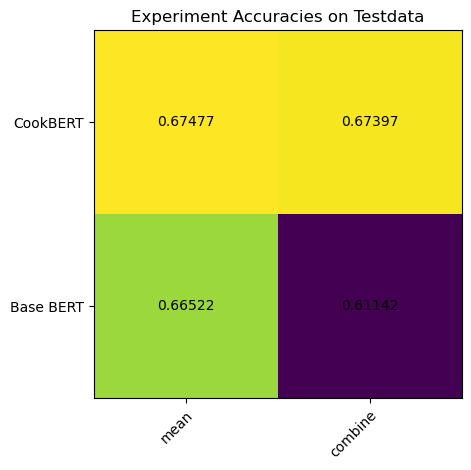

In [92]:
models = ["CookBERT", "Base BERT"]
combining_mode = ["mean", "combine"]

test_accuracies = np.array([[0.67477,0.67397],[0.66522,0.61142]])

fig, ax = plt.subplots()
im = ax.imshow(test_accuracies)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(combining_mode)), labels=combining_mode)
ax.set_yticks(np.arange(len(models)), labels=models)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(models)):
    for j in range(len(combining_mode)):
        text = ax.text(j, i, test_accuracies[i, j],
                       ha="center", va="center", color="black")

ax.set_title("Experiment Accuracies on Testdata")
fig.tight_layout()
plt.show()


# Ergebnis:

Die Ergebnisse zeigen, dass die TFIDF-Vektorisierung genauere Vorhersagen liefert als ein BERT-Embedding. Die Verwendung eines Topic-spezifischen BERT Transformers hat die Vorhersagegenauigkeit erhöht. Mit 67,477% Accuracy ist die Genauigkeit allerdings weit hinter den Implementationen welche TFIDF-Vektorisierung verwenden. Diese können bis 82% genauigkeit Erreichen [1]. Der Vorteil einer Vektorisierung mittels Transformern ist das sehr wenig Vorverarbeitung der Daten notwendig ist um akzeptable Ergebnisse zu erhalten. Möglicherweise steigt das Potential dieser Methode wenn mehr Synonyme Listenelemente enthalten sind.

Darüber hinaus wurden verschiedene Techniken untersucht, um eine Liste von Zutaten in ein Embedding umzuwandeln. Die folgenden Varianten wurden untersucht:
1. Embedding der einzelnen Zutaten und Mittelung der Embeddings, um ein Gesamtembedding zu erhalten.
2. Embedding eines Satzes, der alle Zutaten enthält.

Variante eins scheint bessere Vorhersageergebnisse zu erzielen. Allerdings ist der unterschied unter Verwendung eines Topicspezifischen modells deutlich geringer als bei Base BERT. 

# Aussicht und folgende experimente:

Eine mögliche Weiterentwicklung wäre die Verwendung eines BERT-Modells, das mit Sicherheit alle Tokens in diesem Datensatz kennt. Dazu könnten Wikipedia-Einträge oder Kochrezepte von Rezeptwebsites gesammelt werden, die die Tokens enthalten. Masked Token Prediction könnte die Repräsentation des Sprachmodells für diese neuen Tokens festigen. Möglicherweise kann ein Embedding eines solchen Modells eine wettbewerbsfähige Vorhersagegenauigkeit erzielen.

# Literatur
[1]
Kavyasreeb, Whats cooking??? Kaggle, 2021. [Online]. Available: https://www.kaggle.com/code/kavyasreeb/whats-cooking

[2]
A. Vaswani et al., “Attention is All You Need,” 2017. [Online]. Available: https://arxiv.org/pdf/1706.03762.pdf

[3]
J. Devlin, M.-W. Chang, K. Lee, and K. N. Toutanova, “BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding,” 2018. [Online]. Available: https://arxiv.org/abs/1810.04805

[4]
Paschistrobel, Paschistrobel/cookbert: Domain specific Bert Model for the cooking domain. 2022. [Online]. Available: https://github.com/paschistrobel/CookBERT

[5]
S. Velliangiri, S. Alagumuthukrishnan, and S. I. Thankumar joseph, “A Review of Dimensionality Reduction Techniques for Efficient Computation,” Procedia Computer Science, vol. 165, pp. 104–111, 2019, doi: https://doi.org/10.1016/j.procs.2020.01.079.
